# 📊 Interpretando os Resultados da Regressão Linear

##🎯 Objetivo

Compreender como avaliar a qualidade do ajuste do modelo de regressão linear por meio de métricas como R², resíduos, SST, SSR, SSE e pressupostos estatísticos.

##📐 Métricas Fundamentais

###✅ Total Sum of Squares (SST)

- Nome em português: Soma Total dos Quadrados
- Variabilidade total dos dados em torno da média de Y.
- Mede o quão espalhados os dados estão da média.
- Interpretação: Quanto maior o SST, maior a variabilidade da variável resposta.

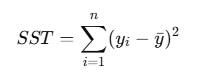

###✅ Regression Sum of Squares (SSR)

- Nome em português: Soma dos Quadrados dos Desvios
- Parte da variabilidade explicada pelo modelo.
- Mede o quanto os valores previstos 𝑦^ estão distantes da média de Y.
- Mede o quanto a regressão conseguiu explicar.
- Interpretação: Quanto maior o SSR, mais o modelo está explicando da variabilidade da resposta.


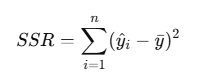

###✅ Sum of Squared Errors (SSE)

- Nome em português: Soma dos Quadrados dos Resíduos
- Representa a variabilidade não explicada pelo modelo.
- Mede a distância entre os valores observados e os previstos.
- Interpretação: Quanto menor o SSE, melhor o modelo está ajustado aos dados.

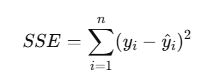

###🔁 Relação entre as métricas

- Total da variação dos dados = Variação explicada pelo modelo + Variação não explicada (erro).

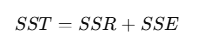

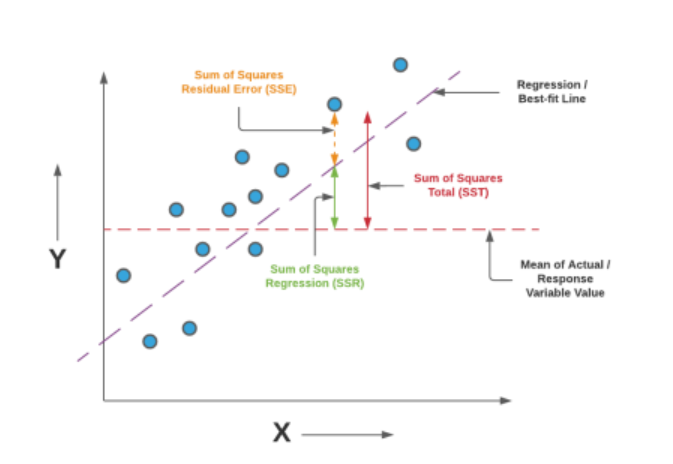

##🔸 Coeficiente de Determinação

Mede a proporção da variância total que é explicada pelo modelo.

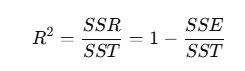

Interpretação:
* R² próximo de 1: o modelo explica bem a variabilidade.
* R² próximo de 0: o modelo não explica quase nada da variabilidade.

Exemplo: Se R² = 0.823, isso significa que 82,3% da variabilidade da variável dependente é explicada pelo modelo.

**Valores baixos de R² são sempre um mal sinal?**

Não necessariamente:
- Se o fenômeno é naturalmente incerto (ex: comportamento humano).
- Se você quer entender relações, não prever, e as Variáveis independentes são estatisticamente significativas.

**Valores altos de R² são sempre um bom sinal?**

Não necessariamente:

- Pode indicar overfitting (modelo ajustado demais à amostra): Quando o modelo “aprende demais” os dados de treinamento. Ele vai muito bem nos dados que já conhece, mas erra feio em novos dados.
- Pode esconder um modelo enviesado. O modelo pode ter R² alto, mas com erros residuais não aleatórios, o que indica que ele está ajustando padrões errados (viés). Para constatar isso, veja o gráfico de resíduos). Verifique: resíduos não aleatórios, padrões sistemáticos.

**Questões importantes sobre R²**

Toda vez que se adiciona uma variável para o modelo, o R² aumenta, mesmo que a variável não seja boa para o modelo. Dessa forma, um modelo de regressão que contenha mais variáveis independentes pode fornecer um ajuste melhor apenas porque contém mais variáveis. Mas a variável adicionada pode ter acrescentado apenas ruído. E o R² não faz essa diferenciação.

Além do que, ao acrescentar mais variáveis, isso aumento a chance de existir multicolinearidade. Multicolinearidade: quando variáveis X estão correlacionadas entre si, os coeficientes ficam instáveis (pequenas mudanças nos dados podem mudar fortemente os valores dos coeficientes).

##🔸 Coeficiente de Determinação Ajustado

Como dissemos, o R² (coeficiente de determinação) mede a proporção da variabilidade da variável dependente que é explicada pelo modelo. No entanto:

* Ele sempre aumenta quando se adiciona mais variáveis, mesmo que essas variáveis sejam irrelevantes (como ruído);
* Não penaliza por complexidade do modelo.

Por isso, usamos o R² ajustado. Ele:
* Corrige o R² levando em conta o número de variáveis no modelo (p) e o tamanho da amostra (N);
* Só aumenta se a nova variável melhora realmente o modelo mais do que o esperado por acaso;
* Pode diminuir com a adição de variáveis irrelevantes → Isso ajuda a evitar overfitting.

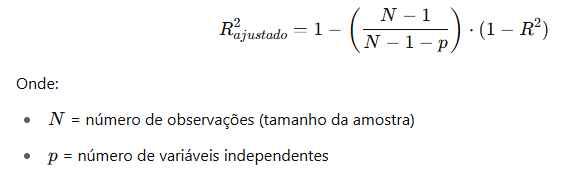

Portanto, ao comparar dois modelos com diferente número de variáveis usando o R² ajustado, sempre prefira o que tem maior R² ajustado (e não apenas o maior R² simples).

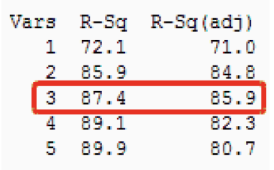

##📊 Intervalo de confiança para regressão

Para cada coeficiente estimado (por exemplo, o da altura no modelo peso ~ altura), temos:

* Uma estimativa pontual (ex: 106,5);
* Uma margem de erro, que gera um intervalo de confiança (IC), normalmente de 95%.

Quando o IC não contém zero, o efeito é estatisticamente significativo (p-valor < 0,05). Isso é essencial para inferência, diferente do R², que fala apenas da qualidade do ajuste.

Já a largura do intervalo de confiança, revela a precisão da estimativa. Faixas mais estreitas sugerem uma estimativa mais precisa.

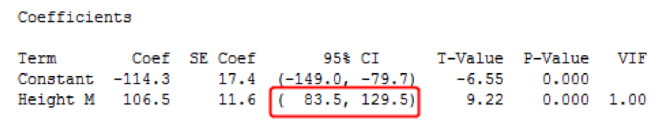

Isso significa que podemos estar 95% confiantes de que o valor real da população para o coeficiente altura está entre 83,5 e 129,5.

**Observação:**

* R² alto, mas com IC amplo ou que inclui zero → Cuidado: pode ter multicolinearidade ou pouca precisão.

* R² baixo, mas com coeficientes significativos → Pode ser útil para entender relações, mesmo que o modelo não explique bem a variação e não seja útil para predição.

* R² ajustado menor ao adicionar variáveis → Indica que a nova variável não melhorou o modelo e pode ser descartada.

## 📊  Teste F e Teste T no contexto da regressão

**Teste t (individual):**

Avalia se cada coeficiente isoladamente é diferente de zero.

* Serve para saber qual variável é significativa dentro do modelo.
* Acompanha a interpretação do p-valor e do intervalo de confiança.

**Teste F (geral):**

Avalia se o conjunto das variáveis independentes melhora o modelo em relação a um modelo sem nenhuma variável (apenas o intercepto). De maneira geral, se nenhuma de suas variáveis independentes for estatisticamente significativa, o teste F também não será estatisticamente significativo.

* Hipótese nula: Nenhuma variável independente ajuda.
* Se p-valor do F < 0,05, seu modelo como um todo é significativo.

**Teste F e Teste t conflitantes**

🟡 Caso 1: Teste F significativo, mas nenhum t significativo
Significa:


* As variáveis, juntas (em combinação), melhoram o modelo — mas individualmente, nenhuma tem força suficiente para ser estatisticamente significativa.

* Por que isso acontece? Pode haver multicolinearidade: as variáveis estão correlacionadas entre si, então dividem “o crédito”. Ou as variáveis só fazem sentido em conjunto (ex: idade e escolaridade como proxies socioeconômicos).

* Como lidar: Checar o VIF (Variance Inflation Factor) para multicolinearidade. Considerar combinações (ex: índices compostos, PCA). Reavaliar a modelagem: você está usando as variáveis certas? Está modelando da forma mais parcimoniosa? Manter as variáveis no modelo, se o objetivo for previsão, e não inferência.

🔴 Caso 2: Teste F não significativo:

* Nem o modelo como um todo é melhor do que um modelo sem variáveis — ou seja, nenhuma variável (nem isolada, nem em conjunto) explica significativamente a Y.

* Possíveis causas: As variáveis escolhidas não têm relação causal/comportamental com Y. Baixo poder estatístico (ex: amostra pequena). Modelo mal especificado (falta variável importante ou a relação não é linear).

* Como lidar: Rever a escolha das variáveis com base em teoria ou conhecimento de domínio. Aumentar a amostra, se possível (para ganhar poder). Explorar outros modelos: regressão polinomial, GLM, árvore de decisão etc. Análise exploratória reforçada: talvez você precise transformar variáveis ou identificar padrões que passou por alto.

## 🤔 Como interpretar quando os Coeficientes quando estão padronizados ou transformados?

##💡 Convergência do Modelo

Convergência significa que o algoritmo encontrou os melhores coeficientes para minimizar o erro.

Pode falhar quando:
* Multicolinearidade está presente.
* A amostra é muito pequena.
* O modelo é mal especificado (ex: muitos termos polinomiais).
* Os dados têm outliers extremos.